In [15]:
# Import packages
%matplotlib inline

import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from mpctools.extensions import mplext, skext
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

# Question 4: (30 points) Exploratory Analysis

In [16]:
# Load dataset
bristol_air = pd.read_csv('BristolAir_Exploratory.csv', compression='bz2')

In [17]:
bristol_air.head()

,Date Time,NOx,NO2,NO,SiteID,Loc.Lat,Loc.Long
0,2007-03-27 13:00:00+00:00,87.00,28.00,28.75,1,51.441747,-2.559956
1,2007-03-27 14:00:00+00:00,98.50,32.00,32.50,1,51.441747,-2.559956
2,2007-03-27 20:00:00+00:00,202.00,97.75,68.00,6,51.427864,-2.563742
3,2007-03-28 02:00:00+00:00,107.80,39.52,44.52,8,51.489993,-2.688779
4,2007-03-28 04:00:00+00:00,115.78,31.94,54.67,8,51.489993,-2.688779


## 4.1 (6 points)

In [4]:
print("Dataset shape: {}".format(bristol_air.shape))
print("Number of instances: {}".format(bristol_air.shape[0]))
print("Number of attributes: {}".format(bristol_air.shape[1]))

Dataset shape: (1306758, 7)
Number of instances: 1306758
Number of attributes: 7


In [5]:
bristol_air.describe()

,NOx,NO2,NO,SiteID,Loc.Lat,Loc.Long
count,1.191220e+06,1.188426e+06,1.197536e+06,1.306758e+06,1.306758e+06,1.306758e+06
mean,1.200819e+02,4.493445e+01,4.956930e+01,8.411554e+00,5.145213e+01,-2.580516e+00
std,1.428863e+02,3.183197e+01,7.645375e+01,5.329009e+00,1.607845e-02,2.738316e-02
min,-3.108000e+01,-6.669844e+00,-1.771000e+01,0.000000e+00,5.142786e+01,-2.688779e+00
25%,3.550000e+01,2.200000e+01,7.000000e+00,4.000000e+00,5.144175e+01,-2.592724e+00
50%,7.300000e+01,3.800000e+01,2.200000e+01,7.000000e+00,5.145543e+01,-2.582253e+00
75%,1.450000e+02,5.950000e+01,5.700000e+01,1.400000e+01,5.146067e+01,-2.562714e+00
max,2.164250e+03,5.765000e+02,1.231250e+03,1.700000e+01,5.148999e+01,-2.535230e+00


In [6]:
bristol_air.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306758 entries, 0 to 1306757
Data columns (total 7 columns):
Date Time    1306758 non-null object
NOx          1191220 non-null float64
NO2          1188426 non-null float64
NO           1197536 non-null float64
SiteID       1306758 non-null int64
Loc.Lat      1306758 non-null float64
Loc.Long     1306758 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 69.8+ MB


In [7]:
max(bristol_air['Loc.Long'])

-2.5352302745900004

In [8]:
bristol_air[bristol_air['SiteID']==1]

,Date Time,NOx,NO2,NO,SiteID,Loc.Lat,Loc.Long
0,2007-03-27 13:00:00+00:00,87.000000,28.000000,28.750000,1,51.441747,-2.559956
1,2007-03-27 14:00:00+00:00,98.500000,32.000000,32.500000,1,51.441747,-2.559956
5,2007-03-28 07:00:00+00:00,410.500000,49.500000,218.250000,1,51.441747,-2.559956
7,2007-03-28 12:00:00+00:00,129.750000,39.500000,45.500000,1,51.441747,-2.559956
12,2006-07-22 02:00:00+00:00,28.000000,16.000000,1.750000,1,51.441747,-2.559956
13,2006-07-22 22:00:00+00:00,53.000000,19.750000,14.750000,1,51.441747,-2.559956
27,2007-10-26 20:00:00+00:00,138.250000,30.250000,59.750000,1,51.441747,-2.559956
39,2014-01-16 16:00:00+00:00,135.250000,66.250000,45.250000,1,51.441747,-2.559956
45,2014-01-18 12:00:00+00:00,39.750000,22.250000,11.500000,1,51.441747,-2.559956
49,2014-02-02 00:00:00+00:00,14.250000,9.000000,3.500000,1,51.441747,-2.559956


In [9]:
len(bristol_air["Loc.Lat"].unique())

17

In [10]:
len(bristol_air["SiteID"].unique())

18

In [11]:
bristol_air.isna().any()

Date Time    False
NOx           True
NO2           True
NO            True
SiteID       False
Loc.Lat      False
Loc.Long     False
dtype: bool

In [12]:
missing_data = bristol_air[bristol_air.isna().any(axis=1)]

In [13]:
len(missing_data)

118872

In [14]:
negative_data = bristol_air[(bristol_air['NOx'] < 0) | (bristol_air['NO2'] < 0) | (bristol_air['NO'] < 0)]
len(negative_data)

576

The dataset has 1,306,758 instances and 7 attributes. Attributes  Loc.Lat* and *Loc.Long* are all of type float, and attribute SiteID is an integer.

Attribute *Date Time* is of type object and states the exact date and time that the air quality data stated in that row was retrieved. The values of *Date Time* range from '1993-01-01 00:00:00+00:00' to '2019-08-12 09:00:00+00:00'.

We observe from our dataset that the attributes *NOx, NO2, NO* are the most problematic given that some entries have missing data and others have negative values. In general, they refer to the amount of each of those chemicals in the air in Bristol, and they are all of type float. NOx refers to all of the most relevant nitrogen oxides for air pollution, such as NO2 and NO. The generic term NOx ranges from -31.08 to 2164.25. NO2 ranges over -6.6698 and 576.5, while NO intervals between -17.71 and 1231.24. However, it seems that there are some outliers in all of these three attributes given that according to their unit of measure μg/m3, they can only have positive values. There are 576 readings with negative values in at least one of these three attributes. Regarding the missing data, by using the .isna() function we obtain that there are 118872 instances with missing NOx, NO2 or NO values. These problematic values for these three specific attributes are unreasonable in our dataset due to the fact that our dataset focuses mainly on air pollution, and without these values we cannot analyse the data.

Regarding missing data, by using the functions .isna().any() we observe that indeed, only the three gas attributes have NaN values.

Concerning attribute *SiteID*, it is an integer valued attribute that uniquely identifies air pollution entries from the same location. In other words, all the data retrieved from the same location has the same SiteID. The location attributes, Loc.Lat and Loc.Long, are of type float that define the coordinates of the locations. Minimum value for the latitude is approximately 51.43, while the maximum is 51.49. As for the longitude, the minimum is -2.69 and maximum is -2.54. Using the .unique() function, we see that we only have 18 different locations in our dataset, all of them around the Bristol area.


## 4.2 (6 points)

In [194]:
# missing_data.groupby('SiteID').SiteID.value_counts()
#missing_percentages = missing_data['SiteID'].value_counts(normalize=True).sort_index() * 100  ## percentage out of all missing data

In [19]:
# # Count the total instances per SiteID in dataset
# instances_perSite = bristol_air.SiteID.value_counts().sort_index()

# # Missing data
# missing_data = bristol_air[bristol_air.isna().any(axis=1)] # Total instances with missing data
# missing_counts = missing_data.SiteID.value_counts().sort_index() # Missing data per SiteID
# missing_percentages = (missing_counts / instances_perSite) * 100
# #missing_percentages = missing_data['SiteID'].value_counts(normalize=True).sort_index() * 100  ## percentage out of all missing data

# # Negative data
# negative_data = bristol_air[(bristol_air['NOx'] < 0) | (bristol_air['NO2'] < 0) | (bristol_air['NO'] < 0)]
# negative_counts = negative_data.SiteID.value_counts().reindex(bristol_air.SiteID.unique(), fill_value=0).sort_index() # Negative data per SiteID
# negative_percentages = (negative_counts / instances_perSite) * 100

# samples_list = [missing_counts, missing_percentages, negative_counts, negative_percentages]
# header = pd.MultiIndex.from_product([['Missing Samples','Negative Samples'],
#                                      ['# of samples','% of samples']])
# problematic_samples = pd.concat(samples_list, axis=1)
# problematic_samples.index.name = 'SiteID'
# problematic_samples.columns = header

# # Generate latex table from dataframe
# problematic_samples.to_latex()

'\\begin{tabular}{lrrrr}\n\\toprule\n{} & \\multicolumn{2}{l}{Missing Samples} & \\multicolumn{2}{l}{Negative Samples} \\\\\n{} &    \\# of samples & \\% of samples &     \\# of samples & \\% of samples \\\\\nSiteID &                 &              &                  &              \\\\\n\\midrule\n0      &             104 &     1.613404 &                0 &     0.000000 \\\\\n1      &           10260 &     6.290195 &                0 &     0.000000 \\\\\n2      &            2739 &     4.348309 &                3 &     0.004763 \\\\\n3      &           19692 &    77.332705 &              198 &     0.777568 \\\\\n4      &            1547 &     2.068541 &                4 &     0.005349 \\\\\n5      &           10060 &     8.828279 &                0 &     0.000000 \\\\\n6      &           10581 &     7.444017 &                4 &     0.002814 \\\\\n7      &            4831 &     4.194960 &              320 &     0.277869 \\\\\n8      &            9228 &    21.056955 &                0 &

In [185]:
# Count the total instances per SiteID in dataset
instances_perSite = bristol_air.SiteID.value_counts().sort_index()

# Missing data
missing_data = bristol_air[bristol_air.isna().any(axis=1)] # Total instances with missing data
missing_counts = missing_data.SiteID.value_counts().sort_index() # Missing data per SiteID
missing_percentages = (missing_counts / instances_perSite) * 100
#missing_percentages = missing_data['SiteID'].value_counts(normalize=True).sort_index() * 100  ## percentage out of all missing data

# Negative data
negative_data = bristol_air[(bristol_air['NOx'] < 0) | (bristol_air['NO2'] < 0) | (bristol_air['NO'] < 0)]
negative_counts = negative_data.SiteID.value_counts().reindex(bristol_air.SiteID.unique(), fill_value=0).sort_index() # Negative data per SiteID
negative_percentages = (negative_counts / instances_perSite) * 100

# problematic_df = pd.DataFrame({'Samples': instances_perSite,
#                                'Missing %': round(missing_percentages, 3), 'Negative %': round(negative_percentages, 2)})
# problematic_df.index.name = 'SiteID'
# print(problematic_df.to_latex())

## 4.3 (4 points)

In [186]:
problematic_df = pd.DataFrame({'Site ID': np.arange(18), 'Samples': instances_perSite,
                               'Missing %': round(missing_percentages, 3), 'Negative %': round(negative_percentages, 2)})

In [196]:
df1 = problematic_df.iloc[:9]
df2 = problematic_df.iloc[9:]
df2 = df2.reset_index()

In [197]:
df1

,Site ID,Samples,Missing %,Negative %
0,0,6446,1.613,0.00
1,1,163111,6.290,0.00
2,2,62990,4.348,0.00
3,3,25464,77.333,0.78
4,4,74787,2.069,0.01
5,5,113952,8.828,0.00
6,6,142141,7.444,0.00
7,7,115162,4.195,0.28
8,8,43824,21.057,0.00


In [201]:
df2 = df2.drop('index', axis=1)

In [203]:
df = pd.concat([df1, df2], axis=1)

In [204]:
print(df.to_latex(index=False))

\begin{tabular}{rrrrrrrr}
\toprule
 Site ID &  Samples &  Missing \% &  Negative \% &  Site ID &  Samples &  Missing \% &  Negative \% \\
\midrule
       0 &     6446 &      1.613 &        0.00 &        9 &    22071 &      5.301 &        0.00 \\
       1 &   163111 &      6.290 &        0.00 &       10 &    96407 &      3.590 &        0.00 \\
       2 &    62990 &      4.348 &        0.00 &       11 &    20693 &      1.904 &        0.09 \\
       3 &    25464 &     77.333 &        0.78 &       12 &    45240 &     17.485 &        0.00 \\
       4 &    74787 &      2.069 &        0.01 &       13 &    12423 &     51.461 &        0.02 \\
       5 &   113952 &      8.828 &        0.00 &       14 &   113951 &     10.532 &        0.00 \\
       6 &   142141 &      7.444 &        0.00 &       15 &     2712 &    100.000 &        0.00 \\
       7 &   115162 &      4.195 &        0.28 &       16 &   154331 &      6.531 &        0.01 \\
       8 &    43824 &     21.057 &        0.00 &       17 &  

In [34]:
sum(problematic_samples['Missing Samples', '# of samples'])

118872

In [35]:
sum(problematic_samples['Negative Samples', '# of samples'])

576

In [36]:
missing_15 = bristol_air[bristol_air["SiteID"] == 15].isna()
missing_15[['NOx', 'NO2', 'NO']].eq(True).all()

NOx    True
NO2    True
NO     True
dtype: bool

Regarding the missing data, out of 1,306,758 instances in our initial dataset, 118,872 instances have at least one missing value. We observe that all 18 sites have at least one missing data in the gas readings. The site with the most missing values in the their corresponding entries is site 3, whereas site 0 has the lowest number of missing values. Also, we see that all the entries for site 15 have missing samples, and by applying .eq(True).all() to the subset of missing samples for site 15, we oberve that indeed, for all instances, all three attributes have missing values.

As for the negative data, there are 576 entries in the dataset with negative values, relatively less than missing data. We observe from the dataframe that not all sites have negative valued gas readings, only 10 sites do. More concretely, sites 0, 1, 5, 8, 9, 12, 14, 15 have logical positive values for all three gas attributes. In this case, site 7 is the one with the most negative values with 55.56% out of the total number of instances with negative values. However, when compared to the total number of instances that site 7 has, only 0.28% of the gases contain negative values.

## 4.4 (3 points)

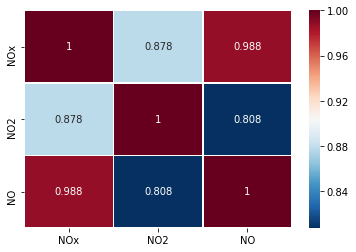

In [209]:
# Remove sites 3 and 15
removed_sites_315 = bristol_air[(bristol_air.SiteID != 3) & (bristol_air.SiteID != 15)]

# Pearson correlation coefficient of the three pollutant columns
nitrogen_oxides = removed_sites_315[['NOx','NO2', 'NO']]
pearson_corr = nitrogen_oxides.corr(method='pearson')
sns.heatmap(pearson_corr, xticklabels=pearson_corr.columns, yticklabels=pearson_corr.columns,
            cmap='RdBu_r', annot=True, linewidth=0.5, fmt='.3g')

## 4.5 (2 points)

As expected, all the diagonal values are very strongly correlated, with the maximum correlation value of 1, given that they are paired with themselves. Obviously, all attributes are highly correlated with themselves. We also observe that the most correlated pair is NO and NOx, with a correlation coefficient of 0.99, followed by the pair NO and NO2, and lastly NO2 and NOx which are the least correlated pair out of the three possible pairs with a value of 0.88.

### CORRELATIONS BETWEEN SITES

In [39]:
# Load dataset to explore correlations between sites
bristol_air_sites = pd.read_csv('BristolAir_SiteAligned.csv', compression='bz2', header=[0,1], parse_dates=[0])

In [40]:
bristol_air_sites.head()

Date Time    NOx                                               \
   Unnamed: 0_level_1      1       2       4       6     7      10     12   
0 2009-03-14 04:00:00  10.50   15.25   21.50   23.75   8.0   53.25   19.0   
1 2009-03-14 05:00:00   9.75    9.50   11.50   23.25  10.0   30.50   19.0   
2 2009-03-15 17:00:00  67.25   88.75   66.00  163.75  36.0  203.75  155.0   
3 2009-03-17 13:00:00  71.75  124.50  135.00   96.50  38.0  172.50  338.0   
4 2009-03-17 15:00:00  82.00  125.00  104.25  106.50  36.0  193.00  321.0   

                  ...       NO                                          \
       14     16  ...        1      2      4      6    7     10     12   
0  201.75   40.0  ...     2.75   2.25   4.00   8.75  0.0  12.50    3.0   
1  138.00   42.0  ...     3.00   2.75   3.00   8.50  0.0   5.75    3.0   
2  429.00   94.0  ...    18.25  27.00  16.50  57.25  3.0  69.75   51.0   
3  734.00  196.5  ...    17.75  53.25  46.25  34.75  6.0  61.50  139.0   
4  679.00  329.0  ...    21.50  47.50  34.25  36.50  5.0  63.75  130.0   

                          
       14      16     17  
0   64.75   12.50   2.50  
1   38.50   12.25   2.25  
2  177.00   21.50  28.50  
3  345.50   71.00  47.00  
4  305.25  134.25  45.50  

[5 rows x 31 columns]

#### Explore data and its structure

In [41]:
print("Number of instances: {}".format(bristol_air_sites.shape[0]))
print("Number of attributes: {}".format(bristol_air_sites.shape[1]))

Number of instances: 14895
Number of attributes: 31


In [42]:
bristol_air_sites['NO']

,1,2,4,6,7,10,12,14,16,17
0,2.75,2.25,4.00,8.75,0.0,12.50,3.0,64.75,12.50,2.50
1,3.00,2.75,3.00,8.50,0.0,5.75,3.0,38.50,12.25,2.25
2,18.25,27.00,16.50,57.25,3.0,69.75,51.0,177.00,21.50,28.50
3,17.75,53.25,46.25,34.75,6.0,61.50,139.0,345.50,71.00,47.00
4,21.50,47.50,34.25,36.50,5.0,63.75,130.0,305.25,134.25,45.50
5,13.00,34.75,46.50,32.75,5.0,54.50,158.0,306.00,107.50,51.50
6,15.00,48.75,49.50,23.25,5.0,71.00,179.0,410.50,146.75,55.50
7,11.00,45.00,60.25,37.50,4.0,72.75,149.0,488.00,121.00,71.75
8,10.50,46.00,60.50,67.00,6.0,82.75,115.0,454.75,97.75,102.25
9,13.75,41.50,52.25,81.25,5.0,60.75,99.0,299.75,116.00,54.00


In [43]:
bristol_air_sites.describe()

NOx                                                          \
                  1             2             4             6             7   
count  14895.000000  14895.000000  14895.000000  14895.000000  14895.000000   
mean      68.493566     76.520109     88.774035    121.398617     46.393085   
std       68.135362     67.278277     72.187096    108.026320     61.831058   
min        1.250000      0.750000      3.330000      2.750000      0.000000   
25%       29.000000     33.000000     44.000000     51.250000     17.000000   
50%       52.250000     59.500000     71.250000     94.000000     29.000000   
75%       83.750000     98.500000    110.500000    155.000000     48.000000   
max      964.750000   1008.250000   1211.750000   1296.250000   1228.000000   

                                                                             \
                 10            12            14            16            17   
count  14895.000000  14895.000000  14895.000000  14895.000000  14895.000000   
mean     136.711978    153.267204    324.191674    105.674581     98.055220   
std      113.846290    119.067046    214.980989     94.249373     79.598234   
min        2.750000      2.000000      4.750000      1.000000      0.750000   
25%       62.250000     65.000000    156.750000     42.750000     41.000000   
50%      107.000000    128.000000    288.750000     80.750000     78.750000   
75%      179.500000    212.000000    455.500000    141.000000    133.625000   
max     2027.000000   1645.000000   2000.750000   1147.000000    801.250000   

           ...                 NO                                            \
           ...                  1             2             4             6   
count      ...       14895.000000  14895.000000  14895.000000  14895.000000   
mean       ...          22.447718     39.582532     31.957222     49.259633   
std        ...          34.127447     53.181351     36.189392     54.829975   
min        ...           0.000000      0.000000      0.000000      0.000000   
25%        ...           5.000000      8.875000     11.000000     15.375000   
50%        ...          13.000000     23.000000     22.250000     33.750000   
75%        ...          25.750000     49.750000     39.250000     62.500000   
max        ...         527.500000    860.250000    675.500000    693.000000   

                                                                             \
                  7            10            12            14            16   
count  14895.000000  14895.000000  14895.000000  14895.000000  14895.000000   
mean      12.108963     54.422745     60.943001    152.795372     37.835131   
std       31.474609     60.594749     60.768008    116.061208     47.578583   
min        0.000000      0.500000      0.000000      0.500000      0.000000   
25%        1.000000     17.750000     16.000000     62.750000      8.250000   
50%        4.000000     35.750000     44.000000    128.750000     22.500000   
75%        8.000000     71.000000     86.000000    219.000000     50.500000   
max      689.000000   1103.000000    888.000000   1110.500000    603.000000   

                     
                 17  
count  14895.000000  
mean      36.123755  
std       39.889625  
min        0.000000  
25%        9.250000  
50%       24.000000  
75%       49.000000  
max      452.500000  

[8 rows x 30 columns]

In [44]:
bristol_air_sites.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14895 entries, 0 to 14894
Data columns (total 31 columns):
(Date Time, Unnamed: 0_level_1)    14895 non-null datetime64[ns]
(NOx, 1)                           14895 non-null float64
(NOx, 2)                           14895 non-null float64
(NOx, 4)                           14895 non-null float64
(NOx, 6)                           14895 non-null float64
(NOx, 7)                           14895 non-null float64
(NOx, 10)                          14895 non-null float64
(NOx, 12)                          14895 non-null float64
(NOx, 14)                          14895 non-null float64
(NOx, 16)                          14895 non-null float64
(NOx, 17)                          14895 non-null float64
(NO2, 1)                           14895 non-null float64
(NO2, 2)                           14895 non-null float64
(NO2, 4)                           14895 non-null float64
(NO2, 6)                           14895 non-null float64
(NO2, 7)      

## 4.6 (5 points)

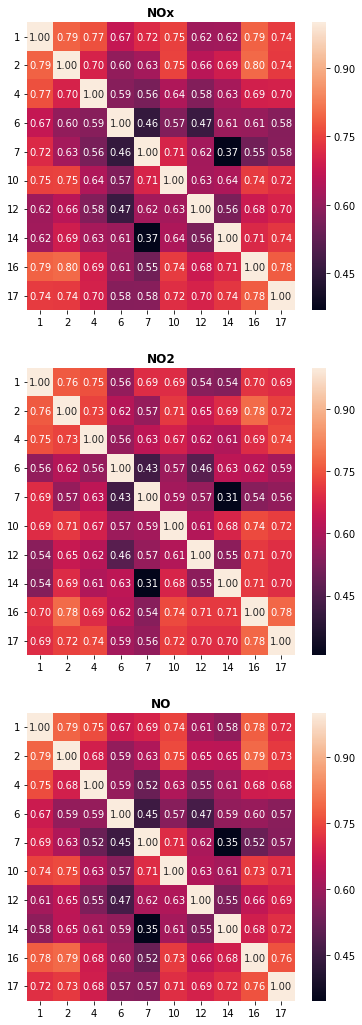

In [45]:
# Remove 'Date Time' column
removed_date = bristol_air_sites.drop('Date Time', axis=1)
#grouped_df = removed_date.groupby(level=1, axis=1).sum()
NOx_df = removed_date['NOx']
NO2_df = removed_date['NO2']
NO_df = removed_date['NO']

pollutant_labels = ['NOx', 'NO2', 'NO']
three_pollutants = [NOx_df, NO2_df, NO_df]
fig, axes = plt.subplots(3, 1, figsize=(6,18))
for i, df in enumerate(three_pollutants):
    pearson_corr = df.corr(method='pearson')
#     ax = sns.heatmap(pearson_corr, xticklabels=pearson_corr.columns, yticklabels=pearson_corr.columns,
#                     cmap='RdBu_r', annot=True, linewidth=0.5, ax=axes[i])
    mplext.plot_matrix(pearson_corr.values, mode='heatmap', show_val=True, ax=axes[i], labels=pearson_corr.columns)
    axes[i].set_title(pollutant_labels[i], fontweight="bold")  

## 4.7 (4 points)

We observe in the NO gas heatmap that the highest correlated sites are the pairs (1,2) and (2,16), both with correlation coefficient 0.79. This means that these location pairs' air pollution quantity is similar. Regarding the NO2 gas, we observe that indeed (2,16) are the highest correlated location pair, followed by (1,2). As for the NOx gas, (2,16) is the highest correlated pair followed by (1,2) and (1,16). Thus, from these observations, we can conclude that the nitrogen oxides of locations 2 and 16 are the most related out of all the sites.

In terms of the least correlated pair, in the NO heatmap the pair (7,14) is the pair with the lowest correlation coefficient, and as expected, the same location pair has the lowest value for the three gases. So, we can say that the locations 7 and 14 have the least related gases.

# Question 5: (19 points) Principal Component Analysis

In [46]:
bristolair_day = pd.read_csv('BristolAir_DayAligned.csv', compression='bz2', parse_dates=[1])

In [47]:
# First two columns: SiteID, Date
# Remaining 72 (24*3) columns are the 24h readings for each of the NOx, NO2, NO pollutants
bristolair_day

,SiteID,Date,0,1,2,3,4,5,6,7,...,62,63,64,65,66,67,68,69,70,71
0,1,2004-07-02,25.250000,18.000000,12.500000,9.250000,8.750000,14.500000,18.500000,30.750000,...,14.250000,13.750000,12.000000,12.500000,10.750000,10.500000,9.250000,9.000000,7.750000,10.750000
1,1,2004-07-03,22.250000,21.000000,23.500000,33.750000,15.500000,9.000000,14.000000,57.750000,...,12.000000,10.250000,11.000000,14.750000,12.500000,11.500000,5.750000,8.250000,6.250000,1.250000
2,1,2004-07-04,28.250000,22.250000,32.000000,34.500000,50.500000,76.500000,165.750000,170.000000,...,19.250000,29.750000,17.500000,26.500000,18.250000,18.750000,12.500000,14.000000,20.750000,26.000000
3,1,2004-07-05,56.750000,62.500000,79.500000,78.500000,115.750000,149.000000,175.000000,119.000000,...,19.250000,23.500000,12.000000,15.500000,12.500000,13.500000,17.750000,38.000000,39.250000,21.500000
4,1,2004-07-06,94.250000,68.250000,44.500000,47.670000,31.750000,28.250000,31.750000,55.750000,...,3.250000,2.250000,3.000000,2.000000,2.000000,1.000000,0.750000,0.750000,1.000000,0.250000
5,1,2004-07-08,28.250000,25.500000,26.250000,27.250000,29.750000,41.500000,48.000000,53.000000,...,26.500000,26.750000,22.500000,26.000000,23.250000,23.750000,20.500000,13.750000,16.000000,36.750000
6,1,2004-07-09,96.750000,78.750000,60.250000,51.750000,50.000000,55.000000,65.000000,65.750000,...,2.750000,3.000000,3.000000,3.500000,3.500000,1.000000,1.750000,3.750000,3.500000,2.500000
7,1,2004-07-10,48.000000,45.250000,45.500000,47.000000,44.750000,41.500000,39.500000,43.500000,...,4.250000,4.500000,4.250000,1.500000,1.750000,1.750000,1.500000,3.250000,1.500000,1.500000
8,1,2004-07-11,38.000000,38.250000,43.500000,48.000000,49.000000,48.500000,51.500000,64.250000,...,14.000000,20.750000,19.750000,13.750000,16.750000,18.750000,15.500000,13.000000,11.500000,11.250000
9,1,2004-07-12,69.500000,66.250000,62.500000,62.500000,65.250000,74.250000,101.000000,137.250000,...,32.250000,30.250000,26.500000,22.500000,22.500000,19.000000,15.000000,13.000000,12.000000,8.500000


## 5.1 (1 point)

In [48]:
gases_df = bristolair_day.drop(['SiteID', 'Date'], axis=1)

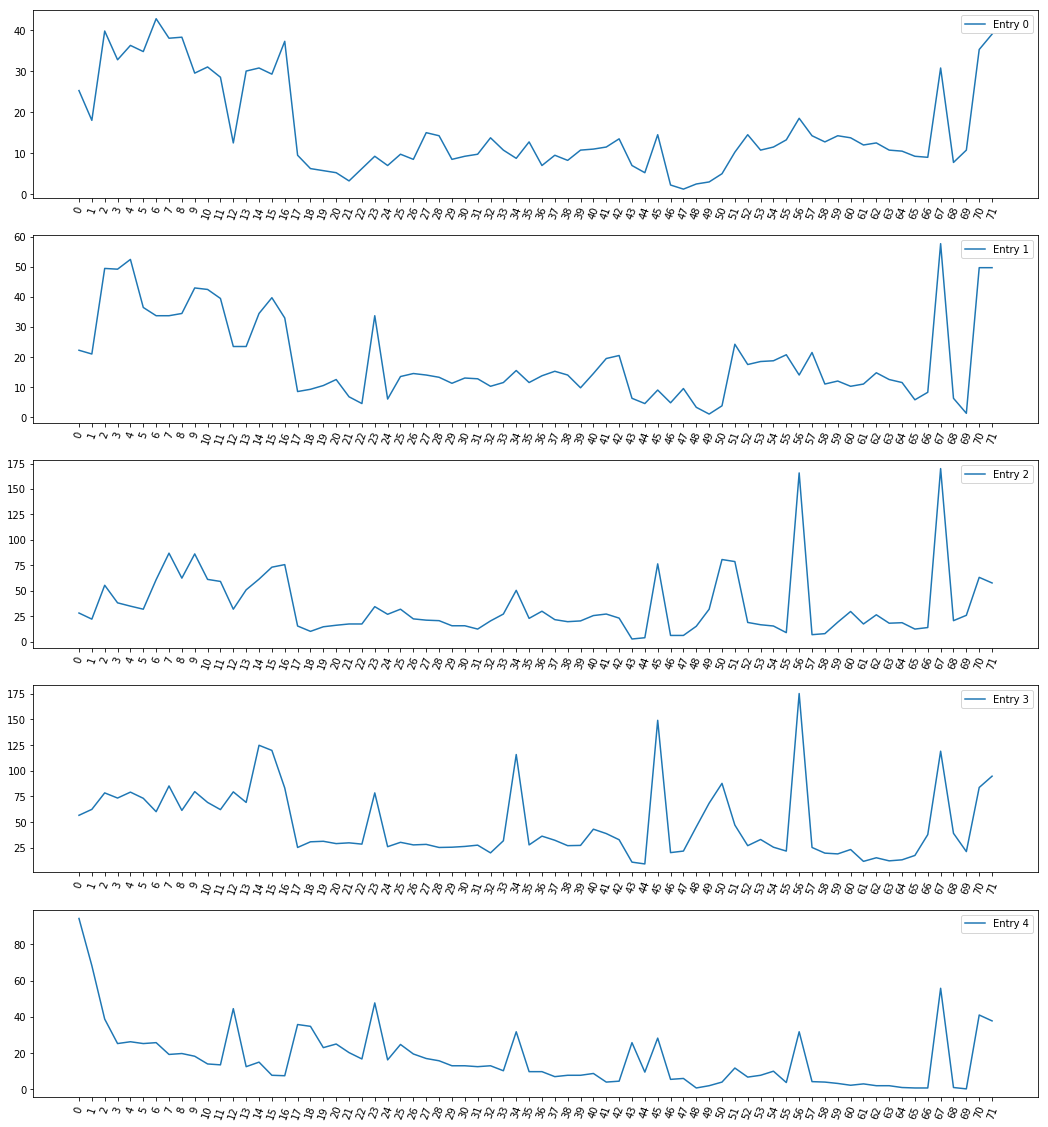

In [124]:
# Plot first five lines
fig, axes = plt.subplots(5, 1, figsize=(18, 20))
for i in range(5):
    ax = sns.lineplot(data=gases_df.iloc[i], ax=axes[i], label="Entry {}".format(i))
    ax.set_xticklabels(gases_df.columns.values, rotation=70)

## 5.2 (5 points)

In [218]:
cum_var[10]

0.9564611746048731

In [217]:
percentage_var

array([5.89005963e-01, 1.38215825e-01, 6.68695255e-02, 5.21656756e-02,
       3.90932157e-02, 2.05041254e-02, 1.43090728e-02, 1.22231108e-02,
       9.84813027e-03, 7.53058237e-03, 6.69594834e-03, 5.63632836e-03,
       4.36097634e-03, 4.11060011e-03, 3.39117708e-03, 2.78430397e-03,
       2.48346627e-03, 2.26409996e-03, 2.23821755e-03, 1.97971454e-03,
       1.86316153e-03, 1.79081162e-03, 1.58425385e-03, 1.27645508e-03,
       1.20195894e-03, 1.09046358e-03, 9.93343911e-04, 8.14208695e-04,
       5.93259681e-04, 5.80359769e-04, 4.89359269e-04, 2.86008986e-04,
       2.63653979e-04, 1.84876122e-04, 1.57743610e-04, 1.31828068e-04,
       1.04927559e-04, 9.96449401e-05, 7.96247149e-05, 7.73178721e-05,
       6.93700656e-05, 6.15899681e-05, 5.77649468e-05, 5.58569653e-05,
       5.40517075e-05, 4.74816814e-05, 4.62273622e-05, 4.34391873e-05,
       4.00306727e-05, 3.71303654e-05, 3.22966703e-05, 2.18097878e-05,
       1.29340161e-05, 1.09950964e-05, 5.26675145e-06, 4.77609153e-06,
      

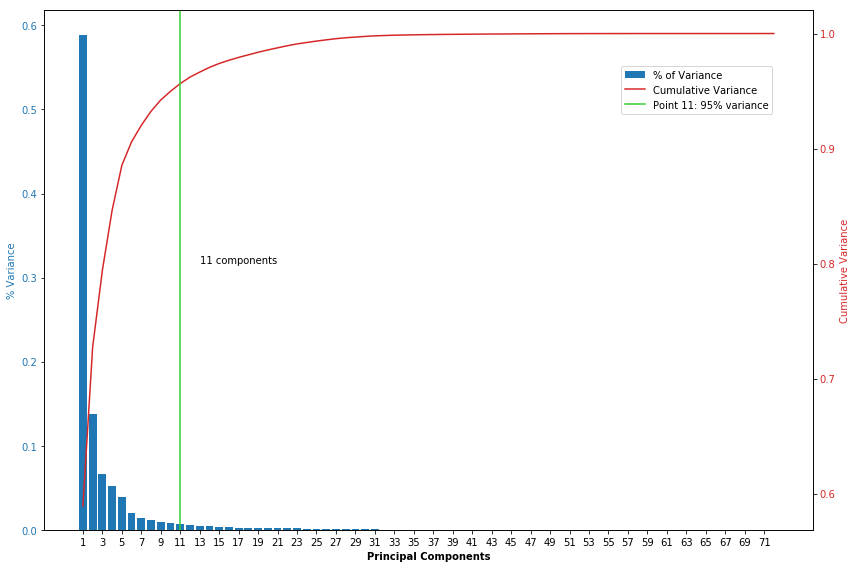

In [184]:
# Extract data from Site 1
bristol_site1 = bristolair_day[bristolair_day['SiteID']==1]
site1 = bristol_site1.drop(['SiteID', 'Date'], axis = 1) 
# Run PCA with 72 components
pca = PCA(n_components=72, random_state=0)
pca.fit(site1)


# Plot graph
X = np.linspace(1, 72, num=72, endpoint=True)
fig, ax1 = plt.subplots(figsize=(12,8))

# % of variance explained by each principal component (bar chart)
percentage_var = pca.explained_variance_ratio_ 
color = 'tab:blue'
ax1.set_xlabel('Principal Components', fontweight='bold')
ax1.set_ylabel('% Variance', color=color)
bar = ax1.bar(X, percentage_var, color=color, label='% of Variance')
ax1.tick_params(axis='y', labelcolor=color)

# Cumulative variance (line plot)
cum_var = percentage_var.cumsum()
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Cumulative Variance', color=color)  # we already handled the x-label with ax1
line = ax2.plot(X, cum_var, color=color, label='Cumulative Variance')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc=0)

#Mark the point at which the number of components collectively explain at least 95% of the variance (vertical line)
for i, var in enumerate(cum_var):
    if (var > 0.95):
        pca_index = i;
        break
pca_index += 1
vline = plt.axvline(pca_index, ymin=0, ymax=1, color='limegreen', label='Point 11: 95% variance')
plt.text(pca_index+2, 0.8, '11 components')

# Show labels in legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=(0.75, 0.8))

plt.xticks(np.arange(1, 72, 2))
fig.tight_layout()
plt.show()

## 5.3 (2 points)

The first principal component accounts for as much of the variability, and each of the succeeding components account for as much of the remaining variability as possible. Thus, as expected, the first principal component has the highest variance, and the variance explained by each principal component (ratio between variance of principal component and the total variance) decreases as we increase the number of principal components. 

Regarding the cumulative variance, at each point we add up the variances of the previous components and can observe how much of the data the projection is showing. In fact, the first 10 components account for just over 95% of the variance. This means that by using the first 10 components, we would cover for most of the important features in our original dataset. Thus, we would want to train our classification algorithm in 10-dimensional data rather than 72-dimensional, which depending on the classification algorithm we choose we will get a more efficient classification than on the 72-dimensional data.

## 5.4 (5 points)

In [52]:
NOx_df = bristol_site1.loc[:, '0':'23']
NO2_df = bristol_site1.loc[:, '24':'47']
NO_df = bristol_site1.loc[:, '48':'71']

In [53]:
pca.mean_[0:24]

array([ 48.63576447,  39.71406098,  35.22721331,  33.23372736,
        36.28830862,  48.11895664,  74.10781294, 102.75039597,
       113.8264737 , 105.15392613,  92.11318792,  80.86611427,
        74.0874192 ,  70.2098689 ,  69.49316991,  70.7540918 ,
        74.55618816,  81.26654404,  84.94389011,  83.03788392,
        76.91879104,  71.35111218,  65.93039261,  57.99676686])

In [54]:
pca.components_[0].reshape(3, 24)

array([[0.11215097, 0.09086027, 0.07897724, 0.07341798, 0.07258611,
        0.08954522, 0.13606713, 0.23629616, 0.32798103, 0.33143126,
        0.26948321, 0.1921154 , 0.13902059, 0.1042075 , 0.09518047,
        0.10472619, 0.12787722, 0.17630726, 0.21562405, 0.22766333,
        0.21112569, 0.18850754, 0.17185378, 0.14644391],
       [0.02002757, 0.01753649, 0.01548071, 0.01473275, 0.0142814 ,
        0.01532315, 0.01887431, 0.02937   , 0.0418395 , 0.04492784,
        0.04066305, 0.03398305, 0.0280984 , 0.02416408, 0.02271379,
        0.02495818, 0.02862167, 0.03516   , 0.04007307, 0.04075624,
        0.03687264, 0.03153639, 0.02786447, 0.02450537],
       [0.05564342, 0.04398285, 0.03799077, 0.03503983, 0.03481364,
        0.04488236, 0.07210518, 0.12877807, 0.17819331, 0.1781181 ,
        0.14130447, 0.09631948, 0.06648427, 0.04687449, 0.04211944,
        0.04651581, 0.05872077, 0.08497201, 0.10673481, 0.11407963,
        0.106503  , 0.09595322, 0.08818225, 0.07439665]])

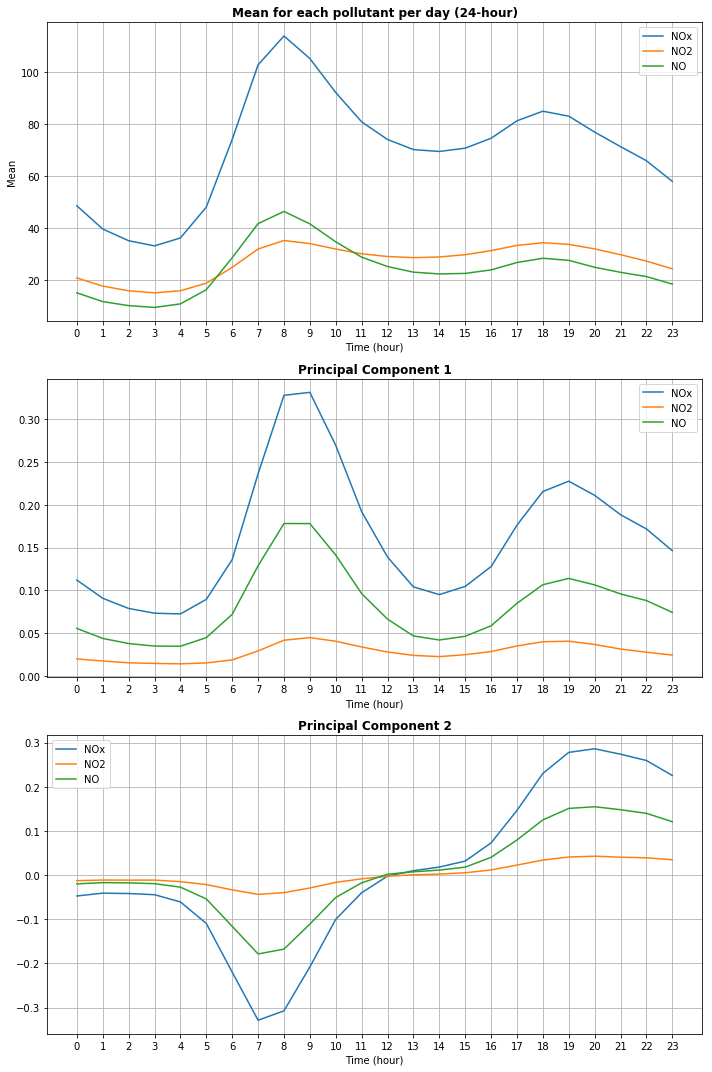

In [55]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))


# Plot mean
mean = pca.mean_.reshape(3, 24)
ax1 = sns.lineplot(data=mean[0], ax=axes[0], label='NOx')
ax1 = sns.lineplot(data=mean[1], ax=axes[0], label='NO2')
ax1 = sns.lineplot(data=mean[2], ax=axes[0], label='NO')
ax1.set_xticks(np.arange(0, 24, 1))
ax1.set_xlabel('Time (hour)')
ax1.set_ylabel('Mean')
ax1.set_title('Mean for each pollutant per day (24-hour)', fontweight="bold")
ax1.grid()

# Plot first principal component
pc1 = pca.components_[0].reshape(3, 24)
ax2 = sns.lineplot(data=pc1[0], ax=axes[1], label='NOx')
ax2 = sns.lineplot(data=pc1[1], ax=axes[1], label='NO2')
ax2 = sns.lineplot(data=pc1[2], ax=axes[1], label='NO')
ax2.set_xticks(np.arange(0, 24, 1))
ax2.set_xlabel('Time (hour)')
ax2.set_title('Principal Component 1', fontweight="bold")
ax2.grid()

# Plot second principal component
pc2 = pca.components_[1].reshape(3, 24)
ax3 = sns.lineplot(data=pc2[0], ax=axes[2], label='NOx')
ax3 = sns.lineplot(data=pc2[1], ax=axes[2], label='NO2')
ax3 = sns.lineplot(data=pc2[2], ax=axes[2], label='NO')
ax3.set_xticks(np.arange(0, 24, 1))
ax3.set_xlabel('Time (hour)')
ax3.set_title('Principal Component 2', fontweight="bold")
ax3.grid()

plt.tight_layout()
plt.show()

## 5.5 (6 points)

From the mean and the first principal component, we observe that the principal component 1 follows the pattern of the mean, but in the case of PC1, there are no overlaps between any of the pollutants. Around 8-9am, we observe that the three pollutants peak. The values also peak around 6-7pm. This is expected because those are the rush hour times during a day, where people drive to work and home, and thus when the highest emissions of these gases occur over the day.

However, there's a significant difference between the mean and the first component. The mean in our case, denotes the average readings for each of the pollutants at each hour of the day. Meanwhile, the first component is the direction in space along which, projections have the largest variance. That is, our graph denotes the projections of each of the data instances in our original data onto our vector for the first principal component. As expected, the variance is quite high, which means that the data is spread out. We observe that there are no overlaps in our PC1 graph.

Comparing the two principal components, we know that PC2 is the direction which maximizes variance among all directions, and is perpendicular to PC1. So each PC has one dimension. In the PC2 graph we observe that we get negative values between 0-12pm, which means that the projections' directions is opposite to the direction of the PC, i.e., a negative relationship, so a high value.

This is because PCA relies on linear assumptions, it searches for orthogonal projections of the dataset that contain the highest variance possible in order to find a hidden linear correlation between the attributes of a dataset.

# Question 6: (41 points) Regression

In [56]:
bristol_air_sites = pd.read_csv('BristolAir_SiteAligned.csv', compression='bz2', header=[0,1], parse_dates=[0])

In [57]:
# Predict NOx level for Site 17
NOx_values = bristol_air_sites['NOx']
X = NOx_values.drop('17', axis=1)
y = NOx_values['17']

## 6.1 (2 points)

In [58]:
#splitter = ShuffleSplit(test_size=0.25, train_size=0.6, random_state=0)
split_indices = skext.multi_way_split(y, sizes=[0.6, 0.15, 0.25], splitter=ShuffleSplit, random_state=0)

X_train = X.ix[split_indices[0]] #X.iloc[split_indices[0],:]
y_train = y.ix[split_indices[0]]

X_val = X.ix[split_indices[1]]
y_val = y.ix[split_indices[1]]

X_test = X.ix[split_indices[2]]
y_test = y.ix[split_indices[2]]

print("Training size: {} instances".format(X_train.shape[0]))
print("Validation size: {} instances".format(X_val.shape[0]))
print("Testing size: {} instances".format(X_test.shape[0]))

Training size: 8937 instances
Validation size: 2234 instances
Testing size: 3724 instances


Training set: 8937 instances
Validation set: 2234 instances
Testing set: 3724 instances

## 6.2 (4 points)

Regressor that always predicts the average (mean) of the target values 'y'. The regressor will just predict the central tendency of classifications.

In [59]:
# Baseline Regressor
pred = sum(y_train) / len(y_train)
train_preds = [pred for i in range(len(X_train))]
val_preds = [pred for i in range(len(X_val))]

# RMSE on training and validation set
train_rmse = sqrt(mean_squared_error(y_train, train_preds))
val_rmse = sqrt(mean_squared_error(y_val, val_preds))

print("Training set RMSE: {}".format(train_rmse))
print("Validation set RMSE: {}".format(val_rmse))

Training set RMSE: 79.71384620780579
Validation set RMSE: 80.2050030835507


Regressor that always predicts the average (mean) of the target values 'y'. The regressor will just predict the central tendency of classifications. The RMSEs we obtain are 79.714 for the training set, and 80.205 for validation.

Given that our baseline predicts the mean, the MSE turns out to be the variance; and the RMSE is the standard deviation. Our RMSE is the standard deviation of the prediction errors/residuals, which denote how far the data points are from the regressor and how spread out the these errors are. In other words, it tells us how concentrated the data points are around the line of best fit. The lower the RMSE the better our regression model.

However, we observe from our results that we get quite high RMSEs for both training and validation, which means that the data points are quite scattered and far from the line of best fit. This is indeed true, because in our taining dataset, our maximum y value is 801.25 and in the validation it is 656.5, whereas the minimum are 0.75 for both. Our baseline model predicts 98.32 for all instances, which is quite far from most of the actual predictions in our datasets, which explains the high error scores we obtained.

## 6.3 (3 points)

In [60]:
# Train regressor on training dataset
lr = LinearRegression()
lr.fit(X_train, y_train)

train_preds = lr.predict(X_train)
val_preds = lr.predict(X_val)

# RMSE on training and validation set
train_rmse = sqrt(mean_squared_error(y_train, train_preds))
val_rmse = sqrt(mean_squared_error(y_val, val_preds))

print("Linear Regression Training set RMSE: {}".format(train_rmse))
print("Linear Regression Validation set RMSE: {}".format(val_rmse))

Linear Regression Training set RMSE: 39.83472027954455
Linear Regression Validation set RMSE: 41.12740349422


We observe that the error is relatively lower than for the baseline regressor, which means our model is more accurate and the predictions are closer to the line of best fit. Moreover, the RMSE on the validation set is not much higher than that on the training set, so we could say our model does not overfit to the training data (although further analysis and inspection would be needed to conclude this).

## 6.4 (5 points)

Normalising the features when applying linear regression is important in order to make different models comparable, given that we want to evaluate the relative importance of each feature. This way, the values will be lying between 0 and 1 on a common scale. That is, if our features have different ranges, it is required to normalise the dataset in order to obtain features with similar ranges. This way, we can capture the actual true information in a feature without disrupting the difference between the values, and we also avoid giving more importance to those features who have higher ranges.

If we did not normalise the feature values, this use of weights of the regression coefficients to evaluate importance of features compared to other features would not be accurate. If the range of some features were bigger than for others, then these features would have a greater influence on the prediction than those features with small ranges (even if this is not true). We would be overweighing those particular features with larger values than other features, and therefore, we would make our model predictions biased towards these features with high values.

Thus, normalising affects the magnitude of the coefficients but does not affect performance of the regressor.

## 6.5 (5 points)

In [66]:
lr_normalized = LinearRegression(normalize=True)
lr_normalized.fit(X_train, y_train)
coeffs = lr_normalized.coef_
ratios = (coeffs / sum(coeffs)) * 100
importance_df = pd.DataFrame({'SiteID': X_train.columns.values, 'Relative Importance': coeffs, 'Ratios': ratios})
importance_df.sort_values('Relative Importance', ascending=False)

,SiteID,Relative Importance,Ratios
8,16,0.161828,20.815086
2,4,0.134139,17.253648
6,12,0.129110,16.606711
0,1,0.115556,14.863344
7,14,0.094507,12.155994
5,10,0.079779,10.261582
4,7,0.059388,7.638717
1,2,0.009947,1.279450
3,6,-0.006799,-0.874532


In [86]:
#df = pd.DataFrame({'Relative Importance': coeffs}, columns = ['1', '2', '4', '6', '7', '10', '12', '14', '16'])

In [89]:
df1 = pd.DataFrame({'SiteID': X_train.columns.values, 'Relative Importance': coeffs})
df1.transpose()
# df.columns = ['1', '2', '4', '6', '7', '10', '12', '14', '16']

,0,1,2,3,4,5,6,7,8
SiteID,1,2,4,6,7,10,12,14,16
Relative Importance,0.115556,0.00994714,0.134139,-0.00679908,0.0593875,0.0797791,0.12911,0.0945073,0.161828


Site 16 is the most important site, with a relative importance of 0.16, whereas the least important is Site 6 with a value of -0.0068 and is negatively correlated. By comparing these values with the correlation coefficients for Site 17 obtained in 4.6, we observe that the site that has the highest correlation coefficient with Site 17 is indeed Site 16 for all three pollutants, and Site 6 is not very correlated with Site 17. So, we can deduce that highly correlated sites have a high relative importance value too. But this is not necessarily always true. Site 2 has a low importance value of 0.0099, but is highly correlated with Site 17.

## 6.6 (5 points)

In [224]:
# kNN regressor 
knn = KNeighborsRegressor(n_jobs=-1)
knn.fit(X_train, y_train)

train_preds = knn.predict(X_train)
val_preds = knn.predict(X_val)

# RMSE on training and validation set
train_rmse = sqrt(mean_squared_error(y_train, train_preds))
val_rmse = sqrt(mean_squared_error(y_val, val_preds))

print("kNN Training set RMSE: {}".format(train_rmse))
print("kNN Validation set RMSE: {}".format(val_rmse))

kNN Training set RMSE: 32.43647936515854
kNN Validation set RMSE: 40.3071558368958


Linear Regression Training set RMSE: 39.83472027954455
Linear Regression Validation set RMSE: 41.12740349422

Linear Regression Training set RMSE: 39.83472027954455
Linear Regression Validation set RMSE: 41.12740349422

The performance on the training set of the kNN regressor is slightly better than the Linear Regressor, improving the error by 7.398. However, the performance on the validation set in both regressors is similar. In fact, the Linear Regressor performs better on the validation set, relative to its training set, with a difference of 1.29; whereas the kNN regressor has a much lower error on the training set, but does not perform that well on the validation set (relative to the training of kNN). This might mean that the kNN does not generalise very well on other datasets and it might be overfitting to the training dataset.

However, kNN algorithm has a limitation for our dataset. It does not work very well on large datasets and dimensions because it needs to compute the distance for each data point at each iteration, for each dimension. Our dataset has a total of 14895 instances and 16 dimensions (without counting our target value for site 17), so it has a high computational cost.

## 6.7 (4 points)

In [90]:
neighbors = [2, 4, 8, 16, 32]
train_RMSEs = []
val_RMSEs = []

for n in neighbors:
    knn_optimised = KNeighborsRegressor(n_neighbors=n)
    knn_optimised.fit(X_train, y_train)
    
    train_preds = knn_optimised.predict(X_train)
    val_preds = knn_optimised.predict(X_val)
    train_rmse = sqrt(mean_squared_error(y_train, train_preds))
    val_rmse = sqrt(mean_squared_error(y_val, val_preds))
    
    train_RMSEs.append(train_rmse)
    val_RMSEs.append(val_rmse)

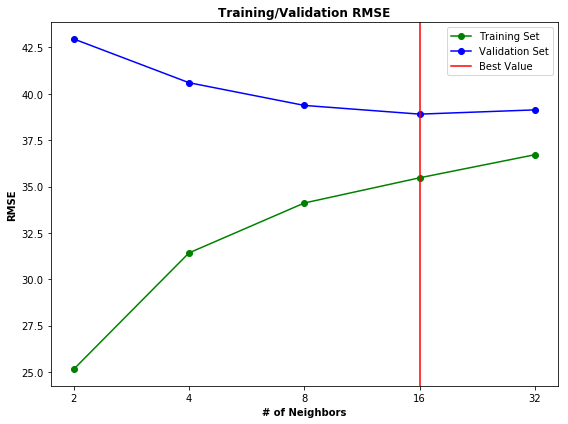

In [100]:
labels = ['2', '4', '8', '16', '32']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))

plt.plot(labels, train_RMSEs, label='Training Set', marker='o', color='green')
plt.plot(labels, val_RMSEs, label='Validation Set', marker='o', color='blue')
plt.axvline(np.argmin(val_RMSEs), color='red', label='Best Value')

ax.set_xlabel('# of Neighbors', fontweight="bold")
ax.set_ylabel('RMSE', fontweight="bold")
ax.set_title('Training/Validation RMSE', fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

## 6.8 (1 point)

Best value for n_neighbors on the validation set is 16 neighbours, which has lowest RMSE value of 38.9018 on validation set. This is because the lower the error the better our model generalises on unseen data.

## 6.9 (4 points)

In [109]:
# Decision Tree regressor
depths = [2, 4, 8, 16, 32, 64]
train_RMSEs = []
val_RMSEs = []

for d in depths:
    dt = DecisionTreeRegressor(max_depth=d, random_state=0)
    dt.fit(X_train, y_train)
    
    train_preds = dt.predict(X_train)
    val_preds = dt.predict(X_val)
    train_rmse = sqrt(mean_squared_error(y_train, train_preds))
    val_rmse = sqrt(mean_squared_error(y_val, val_preds))
    
    train_RMSEs.append(train_rmse)
    val_RMSEs.append(val_rmse)

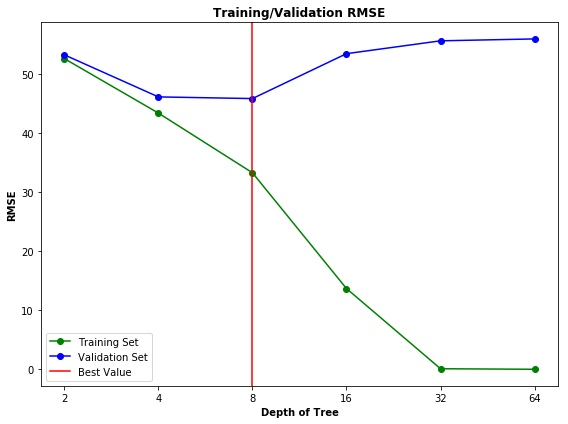

In [112]:
labels = ['2', '4', '8', '16', '32', '64']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))

plt.plot(labels, train_RMSEs, label='Training Set', marker='o', color='green')
plt.plot(labels, val_RMSEs, label='Validation Set', marker='o', color='blue')
plt.axvline(np.argmin(val_RMSEs), color='red', label='Best Value')

ax.set_xlabel('Depth of Tree', fontweight="bold")
ax.set_ylabel('RMSE', fontweight="bold")
ax.set_title('Training/Validation RMSE', fontweight="bold")
ax.set_xticks(x) 
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

## 6.10 (3 points)

Best case RMSE performance on the validation set is for depth 8, with RMSE value 45.8438. We can observe that the Decision Tree Regressor is overfitting. As we increase the depth of the tree, the error decreases significantly on the training set and becomes 0 at depth 32; but for the validation set, the error keeps increasing. So, the DT does not generalise well on the unseen data (validation set) because the error on the validation set does not reflect the error on the training set.

## 6.11 (5 points)

In [113]:
X_trainval = pd.concat([X_train, X_val])
y_trainval = pd.concat([y_train, y_val])

In [114]:
RMSEs = []
models = ['Baseline', 'Linear', 'Nearest Neighbours', 'Decision Tree']

In [115]:
# Baseline Regressor

pred = sum(y_trainval) / len(y_trainval)
test_preds = [pred for i in range(len(X_test))]

# RMSE on testing set
test_rmse = sqrt(mean_squared_error(y_test, test_preds))
RMSEs.append(test_rmse)

In [116]:
# Linear Regressor
lr = LinearRegression()
lr.fit(X_trainval, y_trainval)

test_preds = lr.predict(X_test)
test_rmse = sqrt(mean_squared_error(y_test, test_preds))
RMSEs.append(test_rmse)

In [117]:
# Nearest Neighbours Regressor
knn = KNeighborsRegressor(n_neighbors=16, n_jobs=-1)
knn.fit(X_trainval, y_trainval)

test_preds = knn.predict(X_test)
test_rmse = sqrt(mean_squared_error(y_test, test_preds))
RMSEs.append(test_rmse)

In [118]:
# Decision Tree Regressor
dt = DecisionTreeRegressor(max_depth=8, random_state=0)
dt.fit(X_trainval, y_trainval)

test_preds = dt.predict(X_test)
test_rmse = sqrt(mean_squared_error(y_test, test_preds))
RMSEs.append(test_rmse)

In [138]:
performance_models = pd.DataFrame({'Regression Models': models,'RMSE': RMSEs})

In [219]:
performance_models = performance_models.transpose()
performance_models.columns = models
performance_models = performance_models[1:]
print(performance_models.to_latex())

\begin{tabular}{lllll}
\toprule
{} & Baseline &  Linear & Nearest Neighbours & Decision Tree \\
\midrule
RMSE &  78.9521 &  40.509 &             37.985 &       43.0689 \\
\bottomrule
\end{tabular}



In [220]:
performance_models

,Baseline,Linear,Nearest Neighbours,Decision Tree
RMSE,78.9521,40.509,37.985,43.0689
